Parcial 4 (80%).
Lea las siguientes instrucciones y resuelva el parcial.
Lea cada numeral que se encuentra a continuación. Resuelva utilizando este notebook
El parcial debe enviarse haciendo uso de git. No se reciben archivos de otra forma. Tenga en cuenta que se debe subir usando git bash y no cargar desde la web, los archivos que se suban desde la web serán descartados.


Punto 1
Utilice programación orientada a objetos POO para crear un sistema o máquina de la siguiente forma.

El sistema tiene 3 luces, una roja para las alarmas, una verde para el funcionamiento y una amarilla para las alertas.
El sistema tiene un sensor de presión en bares, un sensor de tensión eléctrica en voltios y un sensor de velocidad en RPMs.
El sistema muestra alertas con la luz amarilla si hay algún sensor fuera del rango de operación. Esto es, de 0 a 10 bares, de 120 a 240 voltios y de 8 a 12 RPMs.
El sistema muestra alarma si hay 2 sensores o más fuera del rango de operación.
Las RPMs vienen de un motor que depende de la corriente para modificar su velocidad, esta corriente a su vez depende del voltaje sabiendo que la potencia es un valor fijo que ud seleccionará. Recuerde que P = V.I.
Al incio las variables de operación deben iniciar en un valor dentro del rango, se da un start para inciar el proceso y se debe simular el funcionamiento del sistema con variables aleatorias para los sensores y corriente del motor. Además se debe mostrar los tiempos de alerta, alarma y funcionamiento del motor con un método de mostrar_informacion().
Utilice al menos 4 métodos.

In [143]:
import random
import time


class Luz:
    def _init_(self, color):
        self.color = color
        self.encendida = False

    def encender(self):
        self.encendida = True

    def apagar(self):
        self.encendida = False

    def _str_(self):
        return f"Luz {self.color}: {'Encendida' if self.encendida else 'Apagada'}"

class Sensor:
    def _init_(self, tipo, rango_min, rango_max):
        self.tipo = tipo
        self.valor = 0
        self.rango_min = rango_min
        self.rango_max = rango_max

    def leer_valor(self):
        self.valor = random.uniform(self.rango_min - 5, self.rango_max + 5)

    def esta_fuera_de_rango(self):
        return self.valor < self.rango_min or self.valor > self.rango_max

    def _str_(self):
        return f"Sensor {self.tipo}: {self.valor:.2f}"

class Sistema:
    def _init_(self, potencia):
        self.luz_roja = Luz("Roja")
        self.luz_amarilla = Luz("Amarilla")
        self.luz_verde = Luz("Verde")
        self.sensores = [
            Sensor("Presión", 0, 10),
            Sensor("Tensión", 120, 240),
            Sensor("Velocidad", 8, 12)
        ]
        self.potencia = potencia
        self.tiempo_alerta = 0
        self.tiempo_alarma = 0
        self.tiempo_funcionamiento = 0
        self.estado_actual = "funcionamiento"
        self.iniciar_valores_sensores()

    def iniciar_valores_sensores(self):
        for sensor in self.sensores:
            sensor.valor = random.uniform(sensor.rango_min, sensor.rango_max)

    def calcular_corriente(self, voltaje):
        return self.potencia / voltaje

    def actualizar_sensores(self):
        for sensor in self.sensores:
            sensor.leer_valor()
        # Actualizar velocidad en función del voltaje
        voltaje = self.sensores[1].valor
        corriente = self.calcular_corriente(voltaje)
        self.sensores[2].valor = corriente * 10  # Supongamos que la velocidad en RPM es proporcional a la corriente

    def verificar_estado(self):
        fuera_de_rango = sum(sensor.esta_fuera_de_rango() for sensor in self.sensores)
        if fuera_de_rango >= 2:
            self.luz_roja.encender()
            self.luz_amarilla.apagar()
            self.luz_verde.apagar()
            self.actualizar_tiempo("alarma")
        elif fuera_de_rango == 1:
            self.luz_roja.apagar()
            self.luz_amarilla.encender()
            self.luz_verde.apagar()
            self.actualizar_tiempo("alerta")
        else:
            self.luz_roja.apagar()
            self.luz_amarilla.apagar()
            self.luz_verde.encender()
            self.actualizar_tiempo("funcionamiento")

    def actualizar_tiempo(self, nuevo_estado):
        if self.estado_actual != nuevo_estado:
            tiempo_actual = time.time()
            if self.estado_actual == "funcionamiento":
                self.tiempo_funcionamiento += tiempo_actual - self.inicio_estado
            elif self.estado_actual == "alerta":
                self.tiempo_alerta += tiempo_actual - self.inicio_estado
            elif self.estado_actual == "alarma":
                self.tiempo_alarma += tiempo_actual - self.inicio_estado
            self.inicio_estado = tiempo_actual
            self.estado_actual = nuevo_estado

    def start(self):
        self.inicio_estado = time.time()
        try:
            while True:
                self.actualizar_sensores()
                self.verificar_estado()
                self.mostrar_informacion()
                # con este parametro podemos variar el tiempo de muestra
                time.sleep(2)  # Simulación del tiempo real
        except KeyboardInterrupt:
            print("\nSimulación terminada.")
    # metodo para mostrar informacion
    def mostrar_informacion(self):
        print("\nEstado del Sistema:")
        for sensor in self.sensores:
            print(sensor)
        print(self.luz_roja)
        print(self.luz_amarilla)
        print(self.luz_verde)
        print(f"Tiempo en Funcionamiento: {self.tiempo_funcionamiento:.2f} segundos")
        print(f"Tiempo en Alerta: {self.tiempo_alerta:.2f} segundos")
        print(f"Tiempo en Alarma: {self.tiempo_alarma:.2f} segundos")


sistema = Sistema(potencia=1000)
sistema.start()

TypeError: Sistema() takes no arguments

Punto 2
Utilice la base de datos de NBA para realizar:

Un filtrado básico de los datos eliminando datos faltantes, datos atípicos, haciendo descripción de estadísticas básicas
Al menos 5 gráficas diferentes informativas (al menos 3 tipos diferentes de gráficas y puede combinar con las variables a usar). Usted selecciona las variables de interés y lo que desea analizar.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
 pd.read_csv("/content/drive/MyDrive/Parcial 4/all_seasons.csv")

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [85]:
df=pd.read_csv("/content/drive/MyDrive/Parcial 4/all_seasons.csv")

undrafted_index = df[df['draft_year'] == 'Undrafted'].index
df2 = df.drop(undrafted_index)
df2

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12836,12836,Joe Harris,BKN,31.0,198.12,99.790240,Virginia,USA,2014,2,...,7.6,2.2,1.4,-1.0,0.016,0.089,0.141,0.621,0.091,2022-23
12838,12838,Joe Wieskamp,TOR,23.0,198.12,92.986360,Iowa,USA,2021,2,...,1.0,0.4,0.3,1.0,0.000,0.068,0.115,0.321,0.083,2022-23
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23


In [86]:
df2=pd.read_csv("/content/drive/MyDrive/Parcial 4/all_seasons.csv")
df2["age"]

0        22.0
1        28.0
2        26.0
3        30.0
4        23.0
         ... 
12839    29.0
12840    20.0
12841    25.0
12842    24.0
12843    33.0
Name: age, Length: 12844, dtype: float64

In [90]:
df2=pd.read_csv("/content/drive/MyDrive/Parcial 4/all_seasons.csv")
df2["pts"]

0         3.9
1         3.8
2         8.3
3        10.2
4         2.8
         ... 
12839    33.1
12840     2.4
12841    13.1
12842     3.4
12843     6.4
Name: pts, Length: 12844, dtype: float64

In [89]:
df2=pd.read_csv("/content/drive/MyDrive/Parcial 4/all_seasons.csv")
df2["college"]

0              Louisiana State
1        Northwestern Oklahoma
2               North Carolina
3                Florida State
4                         UCLA
                 ...          
12839                   Kansas
12840            Florida State
12841              Wake Forest
12842                    Texas
12843                  Alabama
Name: college, Length: 12844, dtype: object

In [92]:
df2=pd.read_csv("/content/drive/MyDrive/Parcial 4/all_seasons.csv")
df2["player_height"]

0        193.04
1        190.50
2        203.20
3        203.20
4        213.36
          ...  
12839    213.36
12840    213.36
12841    205.74
12842    208.28
12843    205.74
Name: player_height, Length: 12844, dtype: float64

In [100]:
dfst = df2
dfst.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


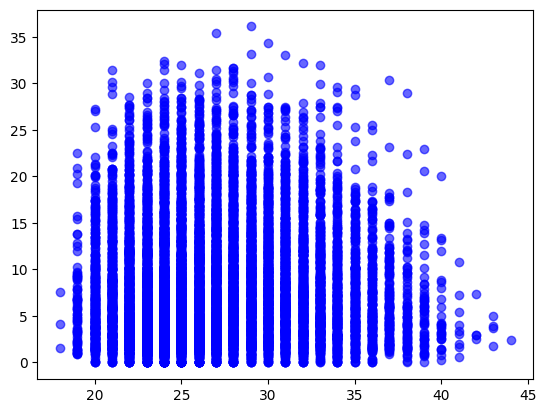

In [95]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df['age'], df['pts'], color='blue', alpha=0.6)

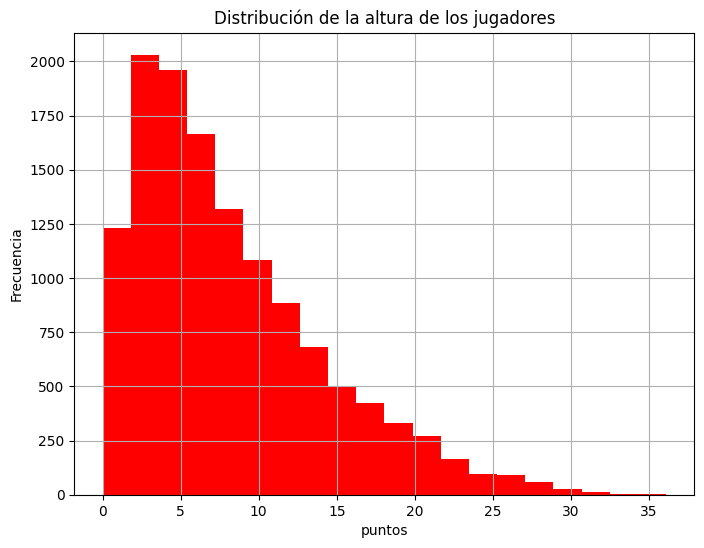

In [140]:
plt.figure(figsize=(8, 6))
plt.hist(df2['pts'], bins=20, color='red')
plt.xlabel('puntos')
plt.ylabel('Frecuencia')
plt.title('Distribución de la altura de los jugadores')
plt.grid(True)
plt.show()


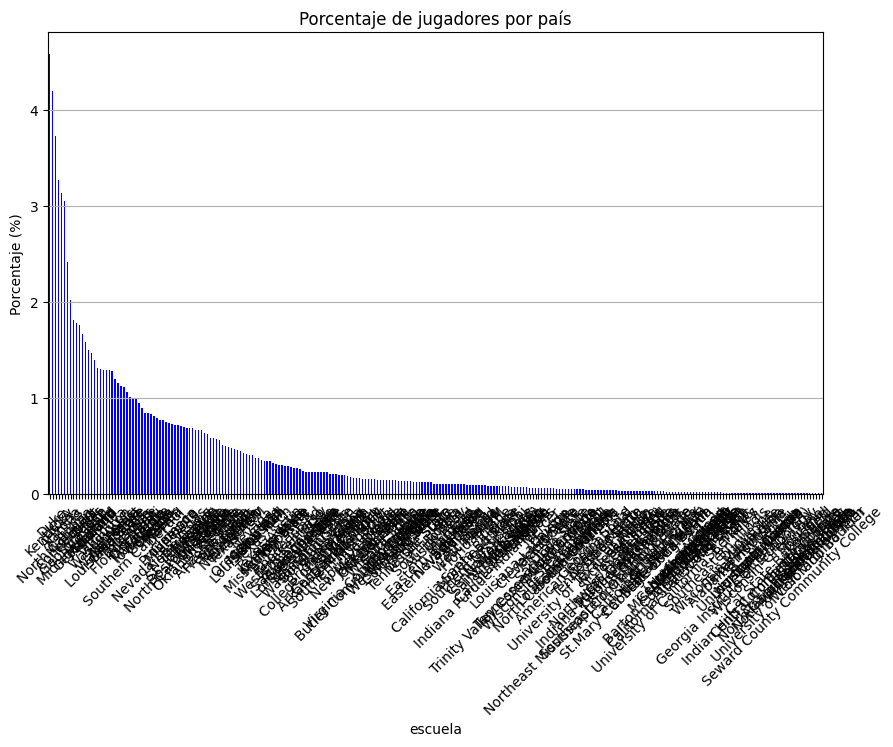

In [142]:
cuentapais = df_filtro['college'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
cuentapais.plot(kind='bar', color='blue')
plt.xlabel('escuela')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de jugadores por país')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Punto 3
Utilice la carpeta audios para:

Cargar los audios y graficar las ondas en un gráfica con múltiples plots.
Mostrar el espectrograma de cada audio usando múltiples plots.
Tratar de filtrar en el audio más largo que es de una finca de animales algún sonido particular de algún animal.

In [125]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import time

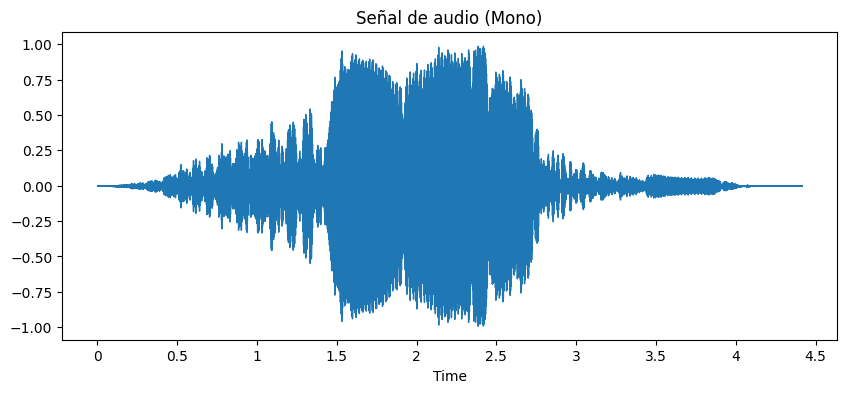

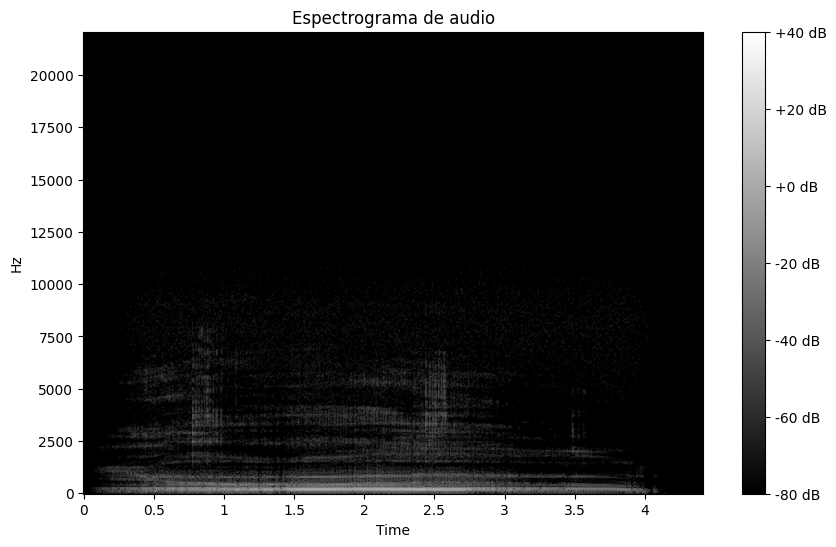

In [131]:
class Audio1:
    def __init__(self, ruta_archivo):
        self.audio, self.sr = librosa.load(ruta_archivo, sr=None)
        self.audio = self.audio[:int(self.sr * 30)]

    def graficar_senal(self, mono=True):
        plt.figure(figsize=(10, 4))
        if mono:
            plt.title('Señal de audio (Mono)')
            librosa.display.waveshow(self.audio, sr=self.sr)
        else:
            plt.subplot(2, 1, 1)
            plt.title('Canal Izquierdo')
            librosa.display.waveshow(self.audio[0], sr=self.sr)
            plt.subplot(2, 1, 2)
            plt.title('Canal Derecho')
            librosa.display.waveshow(self.audio[1], sr=self.sr)
        plt.show()

    def graficar_espectrograma(self, escala_grises=False, fmin=None, fmax=None, n_fft=2048, hop_length=512):
        plt.figure(figsize=(10, 6))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(self.audio, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
        librosa.display.specshow(D, y_axis='linear', sr=self.sr, hop_length=hop_length, x_axis='time', cmap='gray' if escala_grises else 'viridis', vmin=fmin, vmax=fmax)
        plt.title('Espectrograma de audio')
        plt.colorbar(format='%+2.0f dB')
        plt.show()

    def guardar_espectrograma(self, nombre_archivo="espectrograma_default.png", escala_grises=True, fmin=None, fmax=None, n_fft=2048, hop_length=512):
        D = librosa.amplitude_to_db(np.abs(librosa.stft(self.audio, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
        plt.figure(figsize=(10, 6))
        librosa.display.specshow(D, y_axis='linear', sr=self.sr, hop_length=hop_length, x_axis='time', cmap='gray' if escala_grises else 'viridis', vmin=fmin, vmax=fmax)
        plt.title('Espectrograma de audio')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(nombre_archivo)
        plt.close()

ruta_archivo = '/content/drive/MyDrive/Parcial 4/mixkit-big-wild-cat-slow-moan-90.wav'
audio = Audio1(ruta_archivo)
audio.graficar_senal(mono=True)
audio.graficar_espectrograma(escala_grises=True, fmin=-80, fmax=40, n_fft=1024, hop_length=256)
audio.guardar_espectrograma("espectrograma.png", escala_grises=True, fmin=-80, fmax=40, n_fft=1024, hop_length=256)

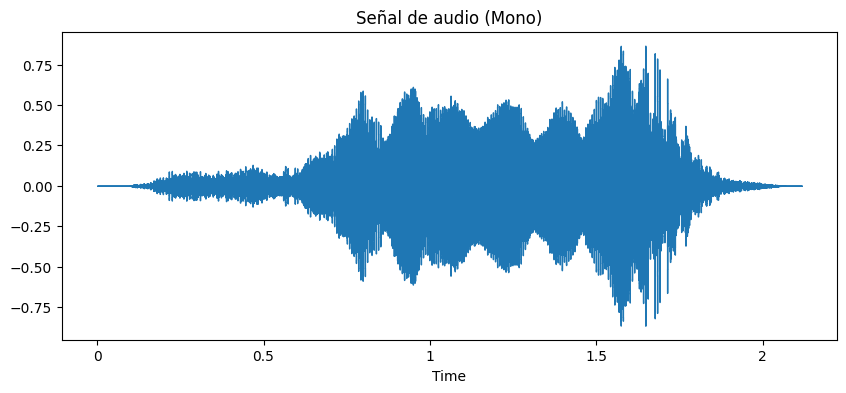

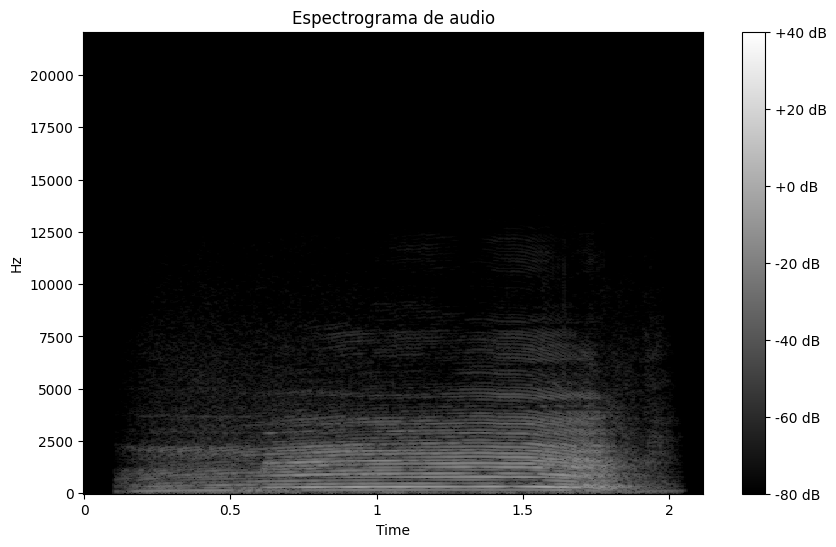

In [127]:
class Audio2:
    def __init__(self, ruta_archivo):
        self.audio, self.sr = librosa.load(ruta_archivo, sr=None)
        self.audio = self.audio[:int(self.sr * 30)]

    def graficar_senal(self, mono=True):
        plt.figure(figsize=(10, 4))
        if mono:
            plt.title('Señal de audio (Mono)')
            librosa.display.waveshow(self.audio, sr=self.sr)
        else:
            plt.subplot(2, 1, 1)
            plt.title('Canal Izquierdo')
            librosa.display.waveshow(self.audio[0], sr=self.sr)
            plt.subplot(2, 1, 2)
            plt.title('Canal Derecho')
            librosa.display.waveshow(self.audio[1], sr=self.sr)
        plt.show()

    def graficar_espectrograma(self, escala_grises=False, fmin=None, fmax=None, n_fft=2048, hop_length=512):
        plt.figure(figsize=(10, 6))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(self.audio, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
        librosa.display.specshow(D, y_axis='linear', sr=self.sr, hop_length=hop_length, x_axis='time', cmap='gray' if escala_grises else 'viridis', vmin=fmin, vmax=fmax)
        plt.title('Espectrograma de audio')
        plt.colorbar(format='%+2.0f dB')
        plt.show()

    def guardar_espectrograma(self, nombre_archivo="espectrograma_default.png", escala_grises=False, fmin=None, fmax=None, n_fft=2048, hop_length=512):
        D = librosa.amplitude_to_db(np.abs(librosa.stft(self.audio, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
        plt.figure(figsize=(10, 6))
        librosa.display.specshow(D, y_axis='linear', sr=self.sr, hop_length=hop_length, x_axis='time', cmap='gray' if escala_grises else 'viridis', vmin=fmin, vmax=fmax)
        plt.title('Espectrograma de audio')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(nombre_archivo)
        plt.close()

ruta_archivo = '/content/drive/MyDrive/Parcial 4/mixkit-cow-moo-in-the-barn-1751.wav'
audio = Audio2(ruta_archivo)
audio.graficar_senal(mono=True)
audio.graficar_espectrograma(escala_grises=True, fmin=-80, fmax=40, n_fft=1024, hop_length=256)
audio.guardar_espectrograma("espectrograma.png", escala_grises=True, fmin=-80, fmax=40, n_fft=1024, hop_length=256)

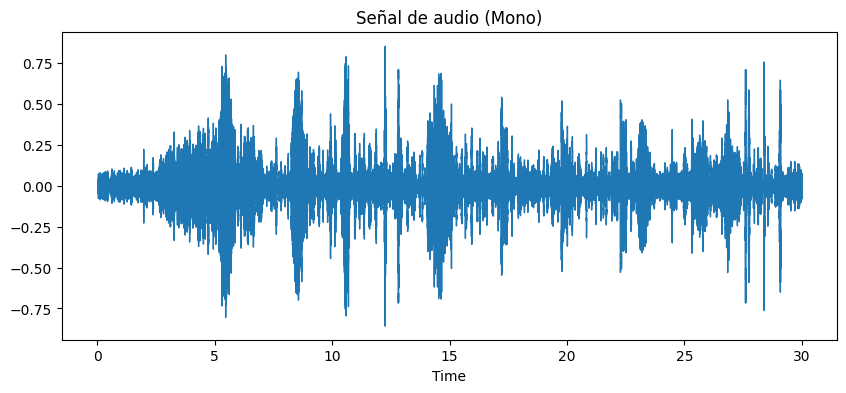

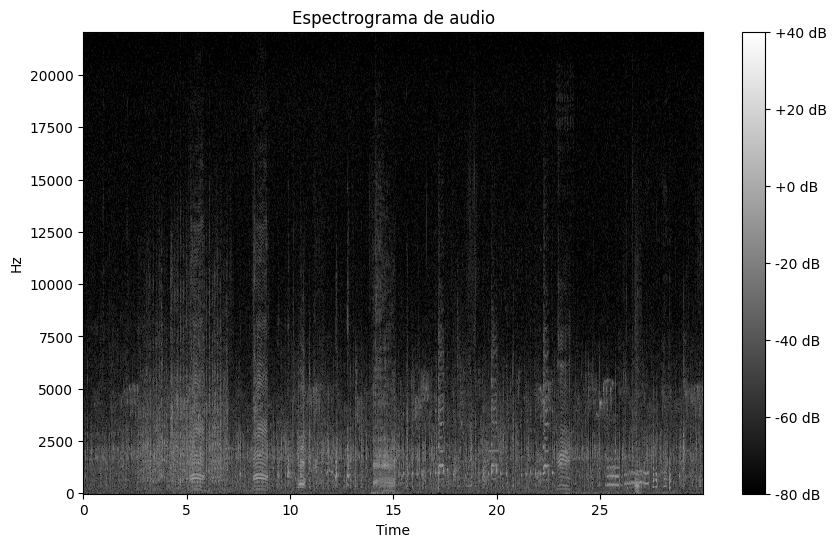

In [128]:
class Audio3:
    def __init__(self, ruta_archivo):
        self.audio, self.sr = librosa.load(ruta_archivo, sr=None)
        self.audio = self.audio[:int(self.sr * 30)]

    def graficar_senal(self, mono=True):
        plt.figure(figsize=(10, 4))
        if mono:
            plt.title('Señal de audio (Mono)')
            librosa.display.waveshow(self.audio, sr=self.sr)
        else:
            plt.subplot(2, 1, 1)
            plt.title('Canal Izquierdo')
            librosa.display.waveshow(self.audio[0], sr=self.sr)
            plt.subplot(2, 1, 2)
            plt.title('Canal Derecho')
            librosa.display.waveshow(self.audio[1], sr=self.sr)
        plt.show()

    def graficar_espectrograma(self, escala_grises=True, fmin=None, fmax=None, n_fft=2048, hop_length=512):
        plt.figure(figsize=(10, 6))
        D = librosa.amplitude_to_db(np.abs(librosa.stft(self.audio, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
        librosa.display.specshow(D, y_axis='linear', sr=self.sr, hop_length=hop_length, x_axis='time', cmap='gray' if escala_grises else 'viridis', vmin=fmin, vmax=fmax)
        plt.title('Espectrograma de audio')
        plt.colorbar(format='%+2.0f dB')
        plt.show()

    def guardar_espectrograma(self, nombre_archivo="espectrograma_default.png", escala_grises=False, fmin=None, fmax=None, n_fft=2048, hop_length=512):
        D = librosa.amplitude_to_db(np.abs(librosa.stft(self.audio, n_fft=n_fft, hop_length=hop_length)), ref=np.max)
        plt.figure(figsize=(10, 6))
        librosa.display.specshow(D, y_axis='linear', sr=self.sr, hop_length=hop_length, x_axis='time', cmap='gray' if escala_grises else 'viridis', vmin=fmin, vmax=fmax)
        plt.title('Espectrograma de audio')
        plt.colorbar(format='%+2.0f dB')
        plt.savefig(nombre_archivo)
        plt.close()

ruta_archivo = '/content/drive/MyDrive/Parcial 4/mixkit-farm-animals-in-the-morning-7.wav'
audio = Audio3(ruta_archivo)
audio.graficar_senal(mono=True)
audio.graficar_espectrograma(escala_grises=True, fmin=-80, fmax=40, n_fft=1024, hop_length=256)
audio.guardar_espectrograma("espectrograma.png", escala_grises=True, fmin=-80, fmax=40, n_fft=1024, hop_length=256)


In [129]:
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile

In [130]:
data = wavfile.read('/content/drive/MyDrive/Parcial 4/mixkit-farm-animals-in-the-morning-7.wav')

#separando los elementos
framerate = data[0]
sounddata = data[1]
time      = np.arange(0,len(sounddata))/framerate

# informacion
print('Sample rate:',framerate,'Hz')
print('Total time:',len(sounddata)/framerate,'s')

Sample rate: 44100 Hz
Total time: 44.35961451247166 s


<ipython-input-130-0af930e64c01>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  data = wavfile.read('/content/drive/MyDrive/Parcial 4/mixkit-farm-animals-in-the-morning-7.wav')
